# Evaluate DiADM for memorization  

## Overview 

Notebook that provides code to evaluate trained diffusion models. Needs image generation model, privacy model, cxr-classification model. 

In [31]:
%run ../basesetup.ipynb 
transform = T.Compose([T.ToTensor(), T.Resize(512)])  # Replace with your transforms if needed


In [32]:
from pprint import pprint
kwargs = {
    "DiADM":{
        "autoguidance":True,
        "guidance":1.4,
        "model_kwargs":{
            "model_weights":"/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_pseudocond/training-state-0050331.pt",
            "gmodel_weights":"/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_uncond/training-state-0008388.pt",
            "path_net":"/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_pseudocond/network-snapshot-0050331-0.100.pkl",
            "path_gnet":"/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_uncond/network-snapshot-0008388-0.050.pkl",
        },
        "ds_kwargs":{
            "cond_mode":"pseudocond", # pseudocond, cond
            "basedir":"/vol/idea_ramses/ed52egek/data/trichotomy",
            "basedir_images":"/vol/ideadata/ed52egek/data/chestxray14"
        }
    }
}

## Check for duplication

In [40]:
filelist = "/vol/ideadata/ed52egek/pycharm/trichotomy/datasets/eight_cxr8_train.txt" 
target_dir = "eval_diadm"
mode = "DiADM"

n_per_index = 16 #if ds_kwargs["cond_mode"] == "pseudocond" else 1
N=5# 95 # smallest (edema)
class_labels_to_sample = class_labels
model_kwargs = kwargs[mode]["model_kwargs"]
ds_kwargs = kwargs[mode]["ds_kwargs"]
model_kwargs["name"] = mode
print("="*80)
print("Model kwargs:")
pprint(model_kwargs)
print("Dataset kwargs:")
pprint(ds_kwargs)

print("="*80)
net, gnet, encoder =  get_image_generation_model(**model_kwargs)

for class_idx, class_label in enumerate(class_labels_to_sample): 
    outdir = f"./{target_dir}/{model_kwargs['name']}/{class_label.replace(' ', '_')}"
    print(f"Saving images to {outdir}")

    dataset, indices = get_ds_and_indices(filelist=filelist, class_idx=class_idx, N=N,n_per_index=n_per_index, **ds_kwargs)

    # indices are the indices of the dataset with certain calss 
    sampler_kwargs = {"autoguidance":kwargs[mode]["autoguidance"], 
                    "guidance":kwargs[mode]["guidance"], }

    print("Sampler kwargs")
    pprint(sampler_kwargs)

    image_iter = ImageIterable(train_ds=dataset, indices=indices, device=torch.device("cuda"), net=net, sampler_fn=edm_sampler, gnet=gnet, encoder=encoder,outdir=outdir, sampler_kwargs=sampler_kwargs)
    for r in tqdm.tqdm(image_iter, unit='batch', total=len(image_iter), desc=f"Generating {class_label} images"):
        pass


Model kwargs:
{'gmodel_weights': '/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_uncond/training-state-0008388.pt',
 'model_weights': '/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_pseudocond/training-state-0050331.pt',
 'name': 'DiADM',
 'path_gnet': '/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_uncond/network-snapshot-0008388-0.050.pkl',
 'path_net': '/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_pseudocond/network-snapshot-0050331-0.100.pkl'}
Dataset kwargs:
{'basedir': '/vol/idea_ramses/ed52egek/data/trichotomy',
 'basedir_images': '/vol/ideadata/ed52egek/data/chestxray14',
 'cond_mode': 'pseudocond'}
Loading network from /vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_pseudocond/network-snapshot-0050331-0.100.pkl ...


/tmp/ipykernel_1468074/2998257040.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_weights)["net"])


Encoder was initilized with {'vae_name': 'stabilityai/stable-diffusion-2', 'encoder_norm_mode': 'cxr8'}
Loading guidance network from /vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/cxr8_diffusionmodels/baseline-runs/cxr8_uncond/network-snapshot-0008388-0.050.pkl ...


/tmp/ipykernel_1468074/2998257040.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gnet.load_state_dict(torch.load(gmodel_weights)["net"])


Setting up StabilityVAEEncoder...
Saving images to ./eval_diadm/DiADM/No_Finding
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating No Finding images: 100%|██████████| 3/3 [00:36<00:00, 12.30s/batch]


Saving images to ./eval_diadm/DiADM/Atelectasis
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Atelectasis images: 100%|██████████| 3/3 [00:37<00:00, 12.35s/batch]


Saving images to ./eval_diadm/DiADM/Cardiomegaly
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Cardiomegaly images: 100%|██████████| 3/3 [00:37<00:00, 12.60s/batch]


Saving images to ./eval_diadm/DiADM/Consolidation
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Consolidation images: 100%|██████████| 3/3 [00:36<00:00, 12.29s/batch]


Saving images to ./eval_diadm/DiADM/Edema
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Edema images: 100%|██████████| 3/3 [00:36<00:00, 12.04s/batch]


Saving images to ./eval_diadm/DiADM/Pleural_Effusion
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Pleural Effusion images: 100%|██████████| 3/3 [00:36<00:00, 12.00s/batch]


Saving images to ./eval_diadm/DiADM/Pneumonia
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Pneumonia images: 100%|██████████| 3/3 [00:36<00:00, 12.14s/batch]


Saving images to ./eval_diadm/DiADM/Pneumothorax
Sampler kwargs
{'autoguidance': True, 'guidance': 1.4}


Generating Pneumothorax images: 100%|██████████| 3/3 [00:37<00:00, 12.60s/batch]


In [41]:
image_list_snth = SnthImageDataset(f"/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/{target_dir}", transform=transform)
print(image_list_snth.image_list[:5])
len(image_list_snth)


[{'model_name': 'DiADM', 'class_name': 'No_Finding', 'real_image_name': '00000002_000.png', 'full_path': '/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/eval_diadm/DiADM/No_Finding/images/00000002_000_seed_0.png'}, {'model_name': 'DiADM', 'class_name': 'No_Finding', 'real_image_name': '00000002_000.png', 'full_path': '/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/eval_diadm/DiADM/No_Finding/images/00000002_000_seed_1.png'}, {'model_name': 'DiADM', 'class_name': 'No_Finding', 'real_image_name': '00000002_000.png', 'full_path': '/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/eval_diadm/DiADM/No_Finding/images/00000002_000_seed_2.png'}, {'model_name': 'DiADM', 'class_name': 'No_Finding', 'real_image_name': '00000002_000.png', 'full_path': '/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/eval_diadm/DiADM/No_Finding/images/00000002_000_seed_3.png'}, {'model_name': 'DiADM', 'class_name': 'No_Finding',

640

In [42]:
from einops import repeat
from torch.nn.functional import binary_cross_entropy
DEFAULT_CLF_PATH =  "/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/results_chexnet_real/saved_models_cxr8/m-05122024-131940.pth.tar"
DEFAULT_PRIV_PATH = "/vol/ideadata/ed52egek/pycharm/trichotomy/privacy/archive/Siamese_ResNet50_allcxr/Siamese_ResNet50_allcxr_checkpoint.pth"


class DiADMSampleEvaluator(): 
    def __init__(self, clf_path=DEFAULT_CLF_PATH, priv_path=DEFAULT_PRIV_PATH) -> None:
        self.privnet = get_privacy_model(path=priv_path) if priv_path is not None else get_privacy_model()
        self.privnet = self.privnet.to("cuda")

        self.clf_model = get_classification_model(clf_path)
        self.clf_model = self.clf_model.to("cuda")

    def predict(self, batch): 
        # 0 - 1, size does not matter
        # batch[0] is real image, 
        # batch[1:] are synthetic images

        pred, f_clf = self.clf_model.lazy_foward(batch)
        clf_pred_scores = binary_cross_entropy(repeat(pred[0], "f -> b f", b=len(pred[1:])), pred[1:], reduction='none')
        clf_pred_scores = clf_pred_scores.mean(dim=1)

        real = repeat(batch[0], "c h w -> b c h w", b=len(batch[1:]))
        snth = batch[1:]

        priv_pred = self.privnet.lazy_pred(real, snth)
        return clf_pred_scores, priv_pred.squeeze()


dse = DiADMSampleEvaluator()

/tmp/ipykernel_1468074/2998257040.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(path)["state_dict"])
/tmp/ipykernel_1468074/2998257040

In [ ]:
def open_real_image(path, transform, root_dir="/vol/ideadata/ed52egek/data/chestxray14"): 
    full_path = os.path.join(root_dir, os.path.join("images", path))
    image = Image.open(full_path).convert('RGB')
    image = transform(image)
    return image


def get_scores(dataloader):

    mem_rates = []
    best_mem_scores = []
    for data in tqdm.tqdm(dataloader):
        real_image_name = data["real_image_name"][0]
        assert real_image_name == data["real_image_name"][-1]
        real = open_real_image(real_image_name, transform)

        data_in = torch.cat([real.unsqueeze(dim=0), data["image"]])
        # 0-1; not resized

        clf_pred_scores, priv_pred = dse.predict(data_in)

        # compute memorization rates and bce 
        memorization_rate = priv_pred.cpu().float().mean()
        best_non_mem_score = (clf_pred_scores + priv_pred).cpu().min().clip(0, 1) #  1 means memorization
        mem_rates.append(memorization_rate)
        best_mem_scores.append(best_non_mem_score)

    return mem_rates, best_mem_scores

dataloader = DataLoader(image_list_snth, batch_size=n_per_index, shuffle=False, num_workers=4)
mem_rates, best_mem_scores = get_scores(dataloader)

plt.scatter(best_mem_scores, mem_rates)
plt.title(f"Guidance: {1.4}")
plt.show()

In [ ]:
def vary_guidance(guidance): 
    filelist = "/vol/ideadata/ed52egek/pycharm/trichotomy/datasets/eight_cxr8_train.txt" 
    target_dir = f"eval_diadm_{guidance}"
    mode = "DiADM"

    n_per_index = 16 #if ds_kwargs["cond_mode"] == "pseudocond" else 1
    N=5# 95 # smallest (edema)
    class_labels_to_sample = class_labels
    model_kwargs = kwargs[mode]["model_kwargs"]
    ds_kwargs = kwargs[mode]["ds_kwargs"]
    model_kwargs["name"] = mode
    print("="*80)
    print("Model kwargs:")
    pprint(model_kwargs)
    print("Dataset kwargs:")
    pprint(ds_kwargs)

    print("="*80)
    net, gnet, encoder =  get_image_generation_model(**model_kwargs)

    if not os.path.exists(target_dir):
        for class_idx, class_label in enumerate(class_labels_to_sample): 
            outdir = f"./{target_dir}/{model_kwargs['name']}/{class_label.replace(' ', '_')}"
            print(f"Saving images to {outdir}")

            dataset, indices = get_ds_and_indices(filelist=filelist, class_idx=class_idx, N=N,n_per_index=n_per_index, **ds_kwargs)

            # indices are the indices of the dataset with certain calss 
            sampler_kwargs = {"autoguidance":kwargs[mode]["autoguidance"], 
                            "guidance":guidance, }

            print("Sampler kwargs")
            pprint(sampler_kwargs)

            image_iter = ImageIterable(train_ds=dataset, indices=indices, device=torch.device("cuda"), net=net, sampler_fn=edm_sampler, gnet=gnet, encoder=encoder,outdir=outdir, sampler_kwargs=sampler_kwargs)
            for r in tqdm.tqdm(image_iter, unit='batch', total=len(image_iter), desc=f"Generating {class_label} images"):
                pass


    image_list_snth = SnthImageDataset(f"/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/{target_dir}", transform=transform)
    print(image_list_snth.image_list[:5])
    len(image_list_snth)

    dataloader = DataLoader(image_list_snth, batch_size=n_per_index, shuffle=False, num_workers=4)
    mem_rates, best_mem_scores = get_scores(dataloader)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.scatter(best_mem_scores, mem_rates)
    plt.title(f"Guidance: {guidance}")
    plt.savefig(f"guidance_{guidance}.pdf")
    plt.show()
    

vary_guidance(1.4)
vary_guidance(2.0)
vary_guidance(4.0)



# Compare scores of privacy breaking and non privacy breaking images 

In [70]:
def get_scores_samplewise(dataloader):

    mem_rates = []
    best_mem_scores = []
    for data in tqdm.tqdm(dataloader):
        real_image_name = data["real_image_name"][0]
        assert real_image_name == data["real_image_name"][-1]
        real = open_real_image(real_image_name, transform)

        data_in = torch.cat([real.unsqueeze(dim=0), data["image"]])
        # 0-1; not resized

        clf_pred_scores, priv_pred = dse.predict(data_in)

        # compute memorization rates and bce 
        memorization_rate = priv_pred.cpu().float()
        best_non_mem_score = (clf_pred_scores).cpu().clip(0, 1) #  1 means memorization
        mem_rates.extend(memorization_rate)
        best_mem_scores.append(best_non_mem_score)

    return mem_rates, best_mem_scores

target_dir = "eval_diadm_1.4"
image_list_snth = SnthImageDataset(f"/vol/ideadata/ed52egek/pycharm/trichotomy/notebooks/02_eval_synthetic/{target_dir}", transform=transform)

dataloader = DataLoader(image_list_snth, batch_size=n_per_index, shuffle=False, num_workers=4)
mem, bce = get_scores_samplewise(dataloader)
mem = [m.item() for m in mem]
bce = torch.cat(bce)


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:05<00:00,  7.66it/s]


In [73]:
#memorized = torch.tensor(bce)
memorized = bce[[m == 1 for m in mem]]
non_memorized = bce[[m == 0 for m in mem]]

Mean memorized: 0.2479
Mean not memorized: 0.2481


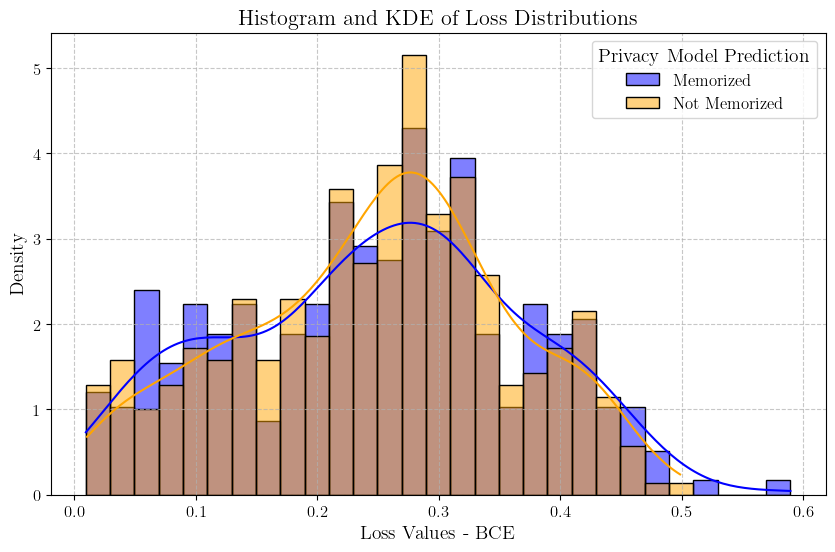

In [77]:
# Calculate and print mean values
print(f"Mean memorized: {memorized.mean():.4f}")
print(f"Mean not memorized: {non_memorized.mean():.4f}")

# Labels for the legend
labels = ["Memorized", "Not Memorized"]

# Set up the figure
plt.figure(figsize=(10, 6))  # Increased size for better visibility

# Define bins explicitly (adjust range and step as needed)
bin_edges = np.linspace(min(memorized.min(), non_memorized.min()), 
                        max(memorized.max(), non_memorized.max()), 
                        30)  # 30 bins

# Plot histograms with predefined bins
sns.histplot(
    memorized, kde=True, label=labels[0], stat="density",
    bins=bin_edges, alpha=0.5, color="blue", edgecolor="black"
)
sns.histplot(
    non_memorized, kde=True, label=labels[1], stat="density",
    bins=bin_edges, alpha=0.5, color="orange", edgecolor="black"
)


# Add gridlines
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Labels and title with larger font size
plt.xlabel("Loss Values - BCE", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram and KDE of Loss Distributions", fontsize=16, fontweight="bold")

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend
plt.legend(title="Privacy Model Prediction", fontsize=12, title_fontsize=14, loc="upper right", frameon=True)

# Add a log scale option for the x-axis (optional, uncomment if needed)
# plt.xscale('log')

# Save the plot
plt.savefig("kde_memorized_vs_non_memorized.pdf", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()